In [1]:
# 1. Turn images into dataframe
# 2. Cluster images to see what types of similarities there are
# 3. See if these similarities reflect the sold/unsold boundary
# 4. Use clusters to tag images
# 5. Put images & tags into dataframe with metadata

In [5]:
# following this tutorial: https://github.com/beleidy/unsupervised-image-clustering/blob/master/capstone.ipynb

In [8]:
!pip install opencv-python


    100% |████████████████████████████████| 39.7MB 538kB/s ta 0:00:011    82% |██████████████████████████▌     | 32.8MB 750kB/s eta 0:00:10
You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
% matplotlib inline

import time
import os, os.path
import random
import cv2
import glob
import keras
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

In [12]:
import os

images = [] 
labels = [] # (sold or not sold)

    
for file in os.listdir('/Users/flatironschool/Final-Project/All-Images'):
    
    if os.path.getsize(f'/Users/flatironschool/Final-Project/All-Images/{file}') > 0:

        try:
            
        #   Read the image
            image = cv2.imread(f'/Users/flatironschool/Final-Project/All-Images/{file}')

        #   Resize it
            image = cv2.resize(image,(224,224))

        #   Convert it from BGR to RGB so we can plot them later (because openCV reads images as BGR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #   Now we add it to our array
            images.append((file, image))
            
            labels.append(file.split('-')[0])
            
            
        except:
            print(file)
    
    else: 
        print(file)


.DS_Store
SOLD-KonigsMonotype1.pictClipping
SOLD-aircover-M.Lanzetta.psd


In [13]:
images

[('SOLD-ParisiShinyStar36x36x2_5HRSOLD.jpg', array([[[189, 187, 188],
          [191, 186, 190],
          [189, 187, 192],
          ...,
          [201, 201, 203],
          [202, 202, 203],
          [200, 200, 202]],
  
         [[186, 184, 185],
          [190, 188, 191],
          [187, 186, 188],
          ...,
          [202, 200, 205],
          [201, 200, 205],
          [201, 200, 206]],
  
         [[188, 186, 190],
          [188, 186, 188],
          [190, 188, 190],
          ...,
          [204, 202, 206],
          [203, 201, 206],
          [204, 203, 208]],
  
         ...,
  
         [[199, 188, 181],
          [193, 182, 180],
          [195, 184, 181],
          ...,
          [202, 193, 196],
          [200, 192, 194],
          [201, 192, 195]],
  
         [[201, 190, 183],
          [194, 183, 179],
          [195, 184, 180],
          ...,
          [201, 193, 193],
          [205, 196, 197],
          [200, 191, 192]],
  
         [[197, 181, 174],
        

In [18]:
image_names = []

for i in images: 
    image_names.append(i[0])

In [92]:
len(image_names)

1283

In [93]:
image_names = np.array(image_names)

In [94]:
np.save('image_names', image_names)

In [95]:
image_names_df = pd.DataFrame(image_names)

In [96]:
image_names_df.to_csv('image-names-df')

In [20]:
rgb_vals = []

for i in images: 
    rgb_vals.append(i[1])

In [21]:
len(rgb_vals)

1283

In [99]:
np.save('rgb_vals', rgb_vals)

In [23]:
rgb_vals = np.array(rgb_vals)

In [24]:
rgb_vals.shape

(1283, 224, 224, 3)

In [25]:
rgb_vals_reshaped = rgb_vals.reshape(rgb_vals.shape[0], -1)

In [26]:
rgb_vals_reshaped.shape

(1283, 150528)

In [60]:
# Elbow graph-ing

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(rgb_vals_reshaped)
    kmeanModel.fit(rgb_vals_reshaped)
    distortions.append(sum(np.min(cdist(rgb_vals_reshaped, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / rgb_vals_reshaped.shape[0])


In [50]:
distortions

[26180.85818792124,
 22574.37717226316,
 21658.470409217927,
 21213.990013153267,
 20867.552348216246,
 20534.13860094617,
 20346.251297144834,
 20091.718348981798,
 19958.685809760515]

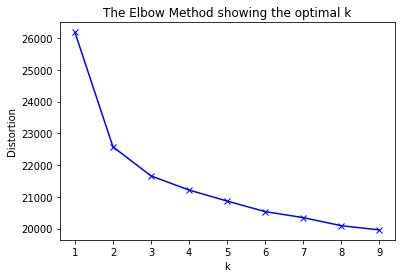

In [51]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Seems like optimal value is k = 2 or 3

In [64]:
# Silhouette method

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

silhouette_plot = []

K = range(2,10) # need to switch from 1-10 to 2-10 because Silhouette score doesn't work with only 1 cluster (because then all labels = 0)

for k in K:
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(rgb_vals_reshaped)
    silhouette_avg = metrics.silhouette_score(rgb_vals_reshaped, cluster_labels)
    silhouette_plot.append(silhouette_avg)


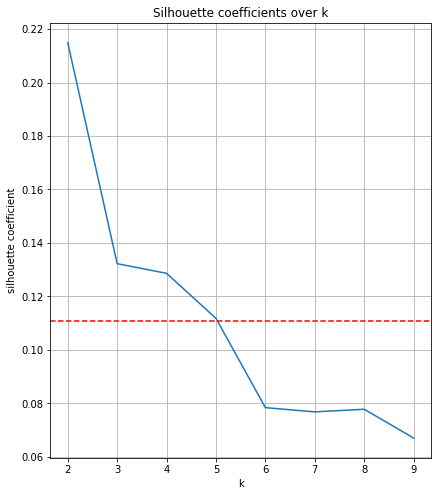

In [65]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [68]:
silhouette_plot

[0.21489100619235935,
 0.13225446062860075,
 0.12864111142091147,
 0.11179541724675056,
 0.0784184084388862,
 0.07683536959542846,
 0.07781512045593005,
 0.06705147783586353]

In [27]:
# cluster predictions without pca, using k-means

model = KMeans(n_clusters=2, random_state=10)

model.fit(rgb_vals_reshaped)

preds = model.fit_predict(rgb_vals_reshaped)


In [28]:
set(preds)

{0, 1}

In [29]:
len(preds)

1283

In [30]:
len(images)

1283

In [32]:
image_names_preds_no_pca = list(zip(image_names, preds))

In [33]:
len(image_names_preds_no_pca)

1283

In [36]:
image_names_preds_no_pca = pd.DataFrame(image_names_preds_no_pca)

In [38]:
image_names_preds_no_pca.to_csv('image_names_preds_no_pca_df')

# Trying same but with PCA

In [39]:
# Must scale when using PCA
from sklearn.preprocessing import StandardScaler

# Create a scalar instance 
scaler = StandardScaler()

# Fit the features only, labels dont need transformation
scaler.fit_transform(rgb_vals_reshaped)


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.16614191,  0.1972337 ,  0.26489088, ...,  0.37510449,
         0.3791549 ,  0.47319049],
       [-1.18859938, -1.53686032, -1.55281008, ..., -1.03260526,
        -1.08530432, -1.03301399],
       [-1.99297703, -1.55095865, -1.2911713 , ..., -1.53828741,
        -0.91064404, -0.62106063],
       ...,
       [ 0.82940068,  0.88805165,  0.92587304, ..., -0.41758644,
        -0.3329216 , -0.09324539],
       [ 0.08147058,  0.42280691, -0.57510729, ...,  0.457107  ,
         0.66129841,  0.73066134],
       [ 0.56127479,  0.63428179,  0.70554566, ...,  0.48444117,
         0.59412139,  0.67916717]])

In [40]:
# Perform PCA with reshaped images
from sklearn.decomposition import PCA

pca_95 = PCA(.95) # Retain 95% of the variance

imgs_low_dim = pca_95.fit_transform(rgb_vals_reshaped)


In [41]:
pca_95.n_components_  # Check number of components for required variance --> 544! -- means I had very noisy data!


544

In [42]:
# if n_components is not set all components are kept (to get the explained variance graph)

pca = PCA()

pca.fit(rgb_vals_reshaped)

pca.n_components_

1283

In [43]:
# Summing explained variance from all features
tot = sum(pca.explained_variance_)
tot

727646422.1828802

In [44]:
# Normalized explained variance
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])
sum(var_exp)

[36.42049930389806, 6.523019721895136, 5.522085734458705, 4.318100554806982, 1.9797505676659648]


99.99999999999999

In [50]:
# Cumulative Explained Variance w.r.t. number of components --- REDO LATER

# plt.style.use('ggplot')
# plt.figure(figsize=(15, 8))
# plt.step(range(0, 1283), ?, where='mid',label='Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance as a Function of the Number of Components')
# plt.ylabel('Cumulative Explained variance')
# plt.xlabel('Principal components')
# plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
# plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
# plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
# plt.legend()
# plt.show()

In [63]:
# elbow graph-ing, but with PCA-data ("imgs_low_dim"): 

distortions = []
K = range(1,101)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(imgs_low_dim)
    kmeanModel.fit(imgs_low_dim)
    distortions.append(sum(np.min(cdist(imgs_low_dim, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / imgs_low_dim.shape[0])


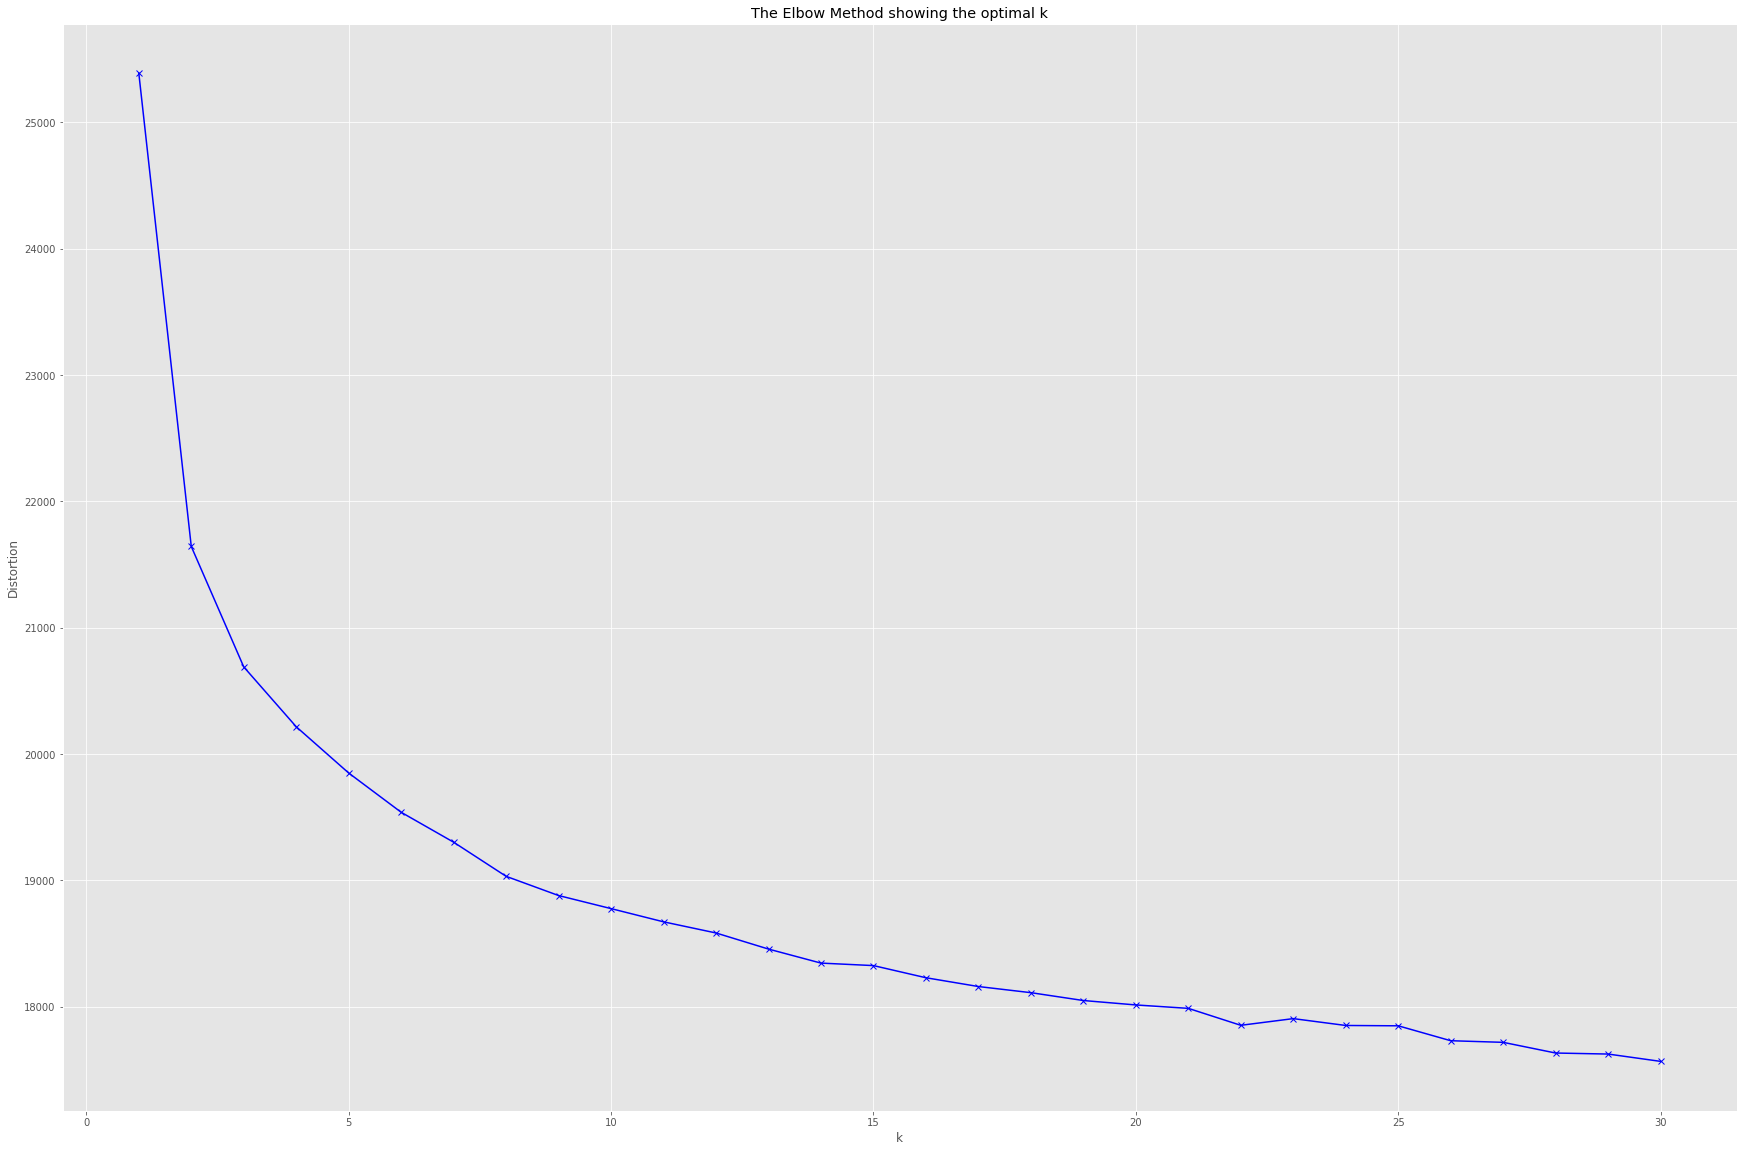

In [72]:
# Plot the elbow
plt.figure(figsize = (30, 20))
plt.plot(K[:30], distortions[:30], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

# Still looks like 2-3 clusters is best

In [81]:
for i in distortions: 
    print(round(i,2))

25391.5
21643.16
20689.45
20215.83
19849.39
19538.56
19301.57
19031.44
18879.35
18775.83
18671.19
18582.94
18455.53
18344.46
18324.73
18228.54
18158.95
18110.32
18048.17
18013.19
17986.12
17851.95
17904.86
17850.65
17847.99
17729.92
17717.08
17632.45
17624.36
17566.34
17544.6
17516.07
17444.33
17421.37
17435.56
17396.68
17305.01
17277.02
17243.58
17199.23
17223.89
17131.36
17087.79
17123.28
17089.19
16998.94
17039.17
16979.99
16911.34
16915.03
16947.06
16853.89
16822.94
16797.35
16756.76
16756.74
16727.39
16651.06
16616.32
16654.17
16549.06
16561.91
16575.84
16558.34
16453.23
16486.83
16467.36
16308.97
16355.98
16344.62
16362.42
16224.66
16301.67
16260.87
16166.81
16276.34
16107.91
16032.28
16161.95
16040.0
16054.33
15937.18
15988.28
15969.9
15945.24
15860.07
15983.34
15889.67
15797.86
15740.14
15699.32
15738.14
15773.13
15662.76
15610.36
15642.14
15572.35
15603.25
15557.42
15534.39


In [91]:
# Silouette method with PCA-ed features

silhouette_plot = []

K = range(2,20) # need to switch from 1-10 to 2-10 because Silhouette score doesn't work with only 1 cluster (because then all labels = 0)

for k in K:
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(imgs_low_dim)
    silhouette_avg = metrics.silhouette_score(imgs_low_dim, cluster_labels)
    silhouette_plot.append(silhouette_avg)

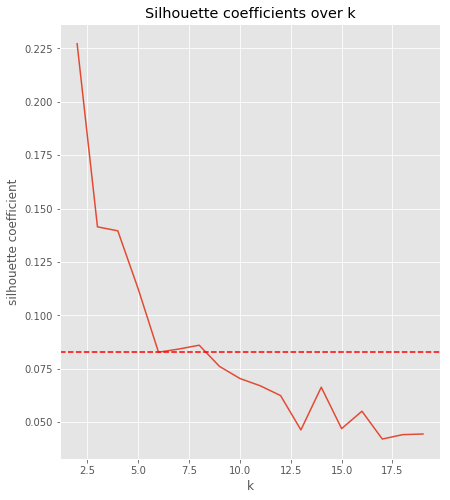

In [75]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 20), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

# This one looks like 2 clusters too

In [76]:

silhouette_plot

[0.22725377512874115,
 0.1414223293531846,
 0.13955077395443685,
 0.11240631474779648,
 0.08267536479890018,
 0.08416469162345294,
 0.0859572883217809,
 0.07601242323680922,
 0.07036251411575341,
 0.06694154774163993,
 0.062346766379376854,
 0.046253200734825146,
 0.06627596379262202,
 0.046865799455468184,
 0.05502567445596114,
 0.041986100713337464,
 0.044034855086833725,
 0.04434483920987336]

In [51]:
# cluster predictions on PCA-ed images, using k-means

model_pca = KMeans(n_clusters=2, random_state=10)

model_pca.fit(imgs_low_dim)

preds_pca = model_pca.predict(imgs_low_dim)


In [52]:
len(preds_pca)

1283

In [53]:
image_names_preds_pca = list(zip(image_names, preds_pca))

In [55]:
image_names_preds_pca_df = pd.DataFrame(image_names_preds_pca)

In [56]:
image_names_preds_pca_df.to_csv('image_names_preds_pca_df')

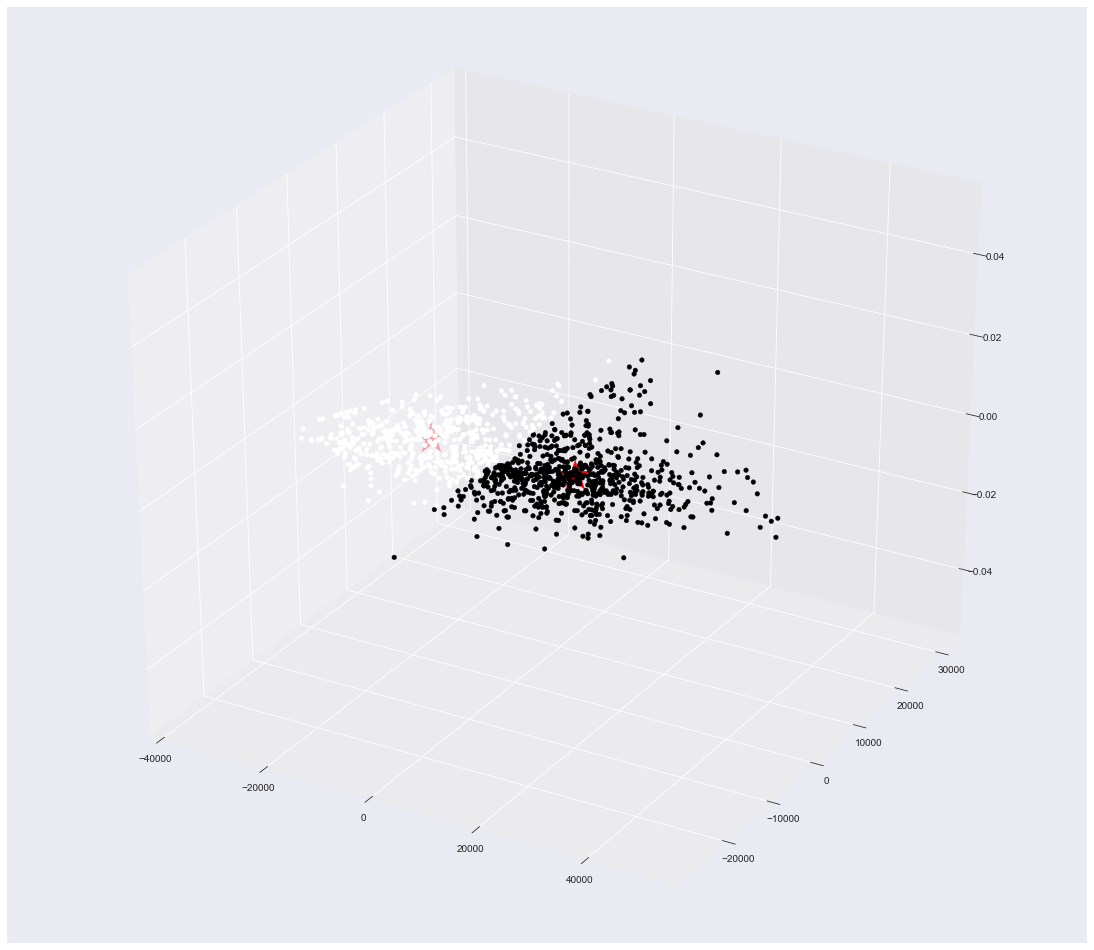

In [175]:
from mpl_toolkits.mplot3d import Axes3D

C = model_pca.cluster_centers_
labels = preds_pca

fig = plt.figure(figsize=(15,13))
ax = Axes3D(fig)
ax.scatter(imgs_low_dim[:, 0], imgs_low_dim[:, 1], c=labels, depthshade=False)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=1000)

In [167]:
set(preds_pca)

{0, 1}

In [145]:
preds_pca = np.array(preds_pca)

In [229]:
import numpy as np
import pandas as pd

preds_pca = np.load('k-preds-pca.npy')

In [230]:
preds_pca_df = pd.DataFrame(preds_pca)

In [231]:
preds_pca_df.to_csv('preds_pca_df.csv')

In [144]:
len(preds_pca)

1283

In [199]:
np.save('k-preds-pca', preds_pca)


# Ignore

In [213]:
# Normalizing before passing to VGG16

def normalise_images(images, labels):

    # Convert to numpy arrays
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)

    # Normalise the images
    images /= 255
    
    return images, labels

In [214]:
images, labels = normalise_images(images, labels)

In [215]:
np.save('normalised-cnn-images', images)

In [218]:
# We'll now load up the keras models with the imagenet weights. We'll remove the top dense layers, since we won't need to classify things here, 
# and we just want these encoded features from the images.

# We'll remove the top dense layers, since we won't need to classify things here, and we just want these encoded features from the images.

vgg16_model = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet")


In [220]:
vgg16_output = cnn_transform(vgg16_model, images)

KeyboardInterrupt: 

In [191]:
# Train test splitting (leave testing alone until end)

# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=20, random_state=123)

In [216]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [219]:
# Dimensionality reduction function

def cnn_transform(cnn_model, raw_images):

    # Pass our training data through the network
    pred = cnn_model.predict(raw_images)

    # Flatten the array
#     flat = pred.reshape(raw_images.shape[0], -1)
    
    return pred

In [198]:
vgg16_output.shape

(1263, 25088)

In [197]:
# Saving output so I don't have to redo the cnn_transform function again

np.save('vgg16_output', vgg16_output)

In [204]:
print("VGG16 flattened output has {} features, rather than 150,52.".format(vgg16_output.shape[1]))

VGG16 flattened output has 25088 features, rather than 150,52.


In [205]:
# Function that creates a PCA instance, fits it to the data and returns the instance

def create_fit_PCA(data, n_components=None):
    
    p = PCA(n_components=n_components, random_state=728)
    p.fit(data)
    
    return p

In [206]:
vgg16_pca = create_fit_PCA(vgg16_output)


In [207]:
# Function to plot the cumulative explained variance of PCA components
# This will help us decide how many components we should reduce our features to
def pca_cumsum_plot(pca):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

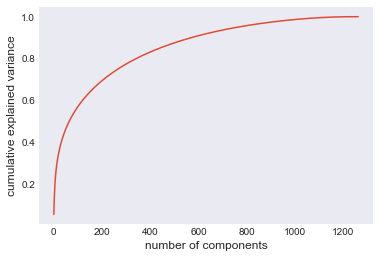

In [208]:
pca_cumsum_plot(vgg16_pca)

In [209]:
vgg16_output_pca = vgg16_pca.transform(vgg16_output)


In [210]:
# Clustering

def create_train_kmeans(data, number_of_clusters=len(y_train)):
    
    # n_jobs is set to -1 to use all available CPU cores. This makes a big difference on an 8-core CPU
    # especially when the data size gets much bigger. #perfMatters
    
    k = KMeans(n_clusters=number_of_clusters, n_jobs=-1, random_state=123)

    # Let's do some timings to see how long it takes to train.
    start = time.time()

    # Train it up
    k.fit(data)

    # Stop the timing 
    end = time.time()

    # And see how long that took
    print("Training took {} seconds".format(end-start))
    
    return k

In [211]:
K_vgg16_pca = create_train_kmeans(vgg16_output_pca)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return 

Training took 41.49993395805359 seconds


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1248) found smaller than n_clusters (1263). Possibly due to duplicate points in X.
  return_n_iter=True)


In [ ]:
#  https://github.com/beleidy/unsupervised-image-clustering/blob/master/capstone.ipynb

In [212]:
print("VGG16:")
K_vgg16 = create_train_kmeans(vgg16_output)

VGG16:


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return 

Training took 629.1005129814148 seconds


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1248) found smaller than n_clusters (1263). Possibly due to duplicate points in X.
  return_n_iter=True)


In [ ]:
# KMeans with PCA outputs
k_vgg16_pred_pca = K_vgg16_pca.predict(vgg16_output_pca)

In [ ]:
# KMeans with CovNet outputs
k_vgg16_pred = K_vgg16.predict(vgg16_output)

In [ ]:
def cluster_label_count(clusters, labels):
    
    count = {}
    
    # Get unique clusters and labels
    unique_clusters = list(set(clusters))
    unique_labels = list(set(labels))
    
    # Create counter for each cluster/label combination and set it to 0
    for cluster in unique_clusters:
        count[cluster] = {}
        
        for label in unique_labels:
            count[cluster][label] = 0
    
    # Let's count
    for i in range(len(clusters)):
        count[clusters[i]][labels[i]] +=1
    
    cluster_df = pd.DataFrame(count)
    
    return cluster_df

In [42]:
# labels = kmeans_cluster.predict(images)


In [43]:
# C = kmeans_cluster.cluster_centers_

In [187]:
# clusters = 2

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10,9))
# # ax = Axes3D(fig)
# plt.scatter(images[:, 0], images[:, 1], c=labels)b
# plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=1000)

In [185]:
# # clusters = 10

# fig = plt.figure(figsize=(10,9))
# ax = Axes3D(fig)
# ax.scatter(images[:, 0], images[:, 1], c=labels)
# ax.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=400)

In [184]:
# number_of_images_to_show=2

# for code in list(set(labels)):

#         indicies = [i for i, label in enumerate(labels) if label == code]
#         random_indicies = [random.choice(indicies) for i in range(number_of_images_to_show)]
#         figure, axis = plt.subplots(1, number_of_images_to_show)

#         print("{} random images for code {}".format(number_of_images_to_show, code))

#         for image in range(number_of_images_to_show):
#             axis[image].imshow(images[random_indicies[image]])
#         plt.show()
        
# # It works!

In [24]:
# Normalizing before passing to VGG19

# def normalise_images(images, labels):

#     # Convert to numpy arrays
#     images = np.array(images, dtype=np.float32)
#     labels = np.array(labels)

#     # Normalise the images
#     images /= 255
    
#     return images, labels

In [25]:
# images, labels = normalise_images(images, labels)

In [59]:
# Train test splitting (leave testing alone until end)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=20, random_state=123)


In [60]:
# Load pre-trained covnet models

# Testing out VGG16, VG19, ResNet50

# We'll now load up the keras models with the imagenet weights. We'll remove the top dense layers, since we won't need to classify things here, 
# and we just want these encoded features from the images.

# Load the models with ImageNet weights:

vgg16_model = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

vgg19_model = keras.applications.vgg19.VGG19(include_top=False, weights="imagenet", input_shape=(224,224,3))

resnet50_model = keras.applications.resnet50.ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))

80142336/80134624 [==============================] - 15s 0us/step


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 14s 0us/step


In [61]:
# The covnet models will give us 3D vectors that represent the image. We need to flatten these for the 
# clustering algorithms to start working with them:

def covnet_transform(covnet_model, raw_images):

    # Pass our training data through the network
    pred = covnet_model.predict(raw_images)

    # Flatten the array
    flat = pred.reshape(raw_images.shape[0], -1)
    
    return flat

In [63]:
# vgg16_output = covnet_transform(vgg16_model, X_train)
# print("VGG16 flattened output has {} features".format(vgg16_output.shape[1]))

# vgg19_output = covnet_transform(vgg19_model, X_train)
# print("VGG19 flattened output has {} features".format(vgg19_output.shape[1]))

# resnet50_output = covnet_transform(resnet50_model, X_train)
# print("ResNet50 flattened output has {} features".format(resnet50_output.shape[1]))

In [64]:
# def create_fit_PCA(data, n_components=None):
    
#     p = PCA(n_components=n_components, random_state=728)
#     p.fit(data)
    
#     return p

In [65]:

# # Create PCA instances for each covnet output
# vgg16_pca = create_fit_PCA(vgg16_output)
# vgg19_pca = create_fit_PCA(vgg19_output)
# resnet50_pca = create_fit_PCA(resnet50_output)

NameError: name 'vgg19_output' is not defined

In [1]:
images

NameError: name 'images' is not defined